# Chapter 4 Classification

Concepts and data from "An Introduction to Statistical Learning, with applications in R"  (Springer, 2013) with permission from the authors: G. James, D. Witten,  T. Hastie and R. Tibshirani " available at [www.StatLearning.com](http://www.StatLearning.com).

For Tables reference see [http://data8.org/datascience/tables.html](http://data8.org/datascience/tables.html)

In [63]:
# HIDDEN
# For Tables reference see http://data8.org/datascience/tables.html
# This useful nonsense should just go at the top of your notebook.
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
from sklearn import linear_model
plots.style.use('fivethirtyeight')
plots.rc('lines', linewidth=1, color='r')
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
# datascience version number of last run of this notebook
version.__version__


import sys
sys.path.append("..")
from ml_table import ML_Table

import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

'en_US.UTF-8'

### 1-dimensional simulation of classification by logistic regression

In logistic regression, we use the logistic function,

$p(X) = \frac{e^{β_0 + β_1X}}{1 + e^{β0+β1X}}$

we seek estimates for β0 and β1 such that the predicted probability $\hat{p}(x_i) for each input
corresponds as closely as possible to the individual’s observed with that input.

The estimates βˆ0 and βˆ1 are chosen to maximize the likelihood function.

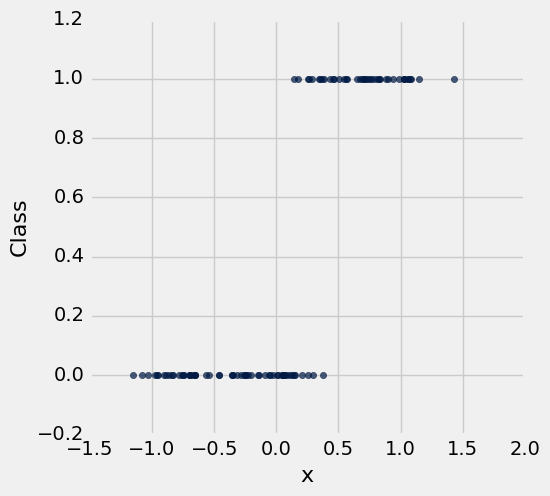

In [64]:
# Simulation of a process that produces a 1d training set
n1 = 100
eps1 = 0.2
test1 = ML_Table.runiform('ix', n1)
# Categories
test1['Cat'] = test1.apply(lambda x: 'A' if x < 0.2 else 'B', 'ix')
# Noise in the relationship of input to category
test1['x'] = test1['ix'] + eps1*np.random.normal(size=n1)
test1['Class'] = test1.apply(lambda x: 0 if x == 'A' else 1, 'Cat')
test1 = test1.drop('ix')
test1.scatter('x', 'Class')

We could look at this in terms of the distribution of each of the categories over the input parameter,
but it doesn't capture the concept of what is the likelihood of each category, given the input.

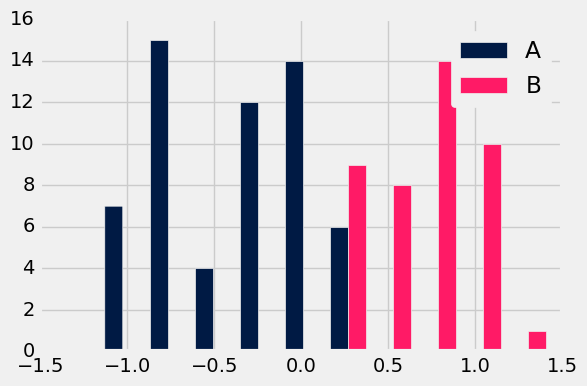

In [65]:
test1.pivot_hist('Cat', 'x')

This would be the density

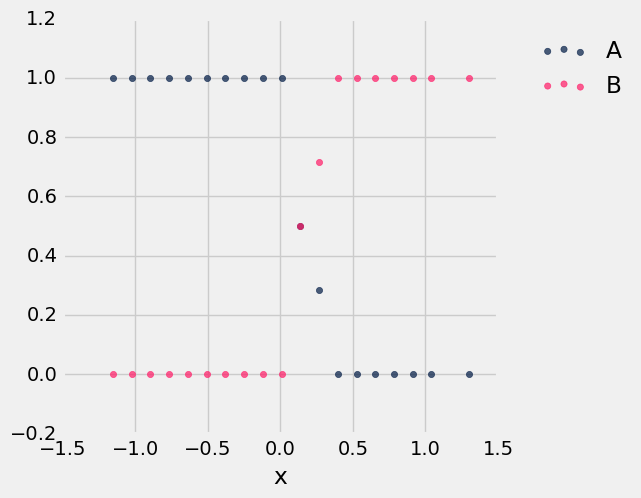

In [66]:
cc = test1.density('Cat', 'x').scatter('x')

Logistical regression to predict 'Class', given input 'x'

In [67]:
logit1d = test1.logit_regression('Class', 'x')

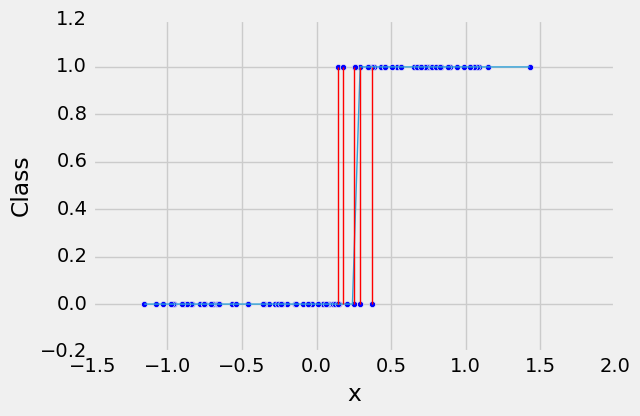

In [68]:
# Visualize the accuracy of the classifier on the training set (training error)
test1.plot_fit_1d('Class', 'x', logit1d.model)

In [69]:
test1.classification_error_model('Class', logit1d.model, 'x')

0.05

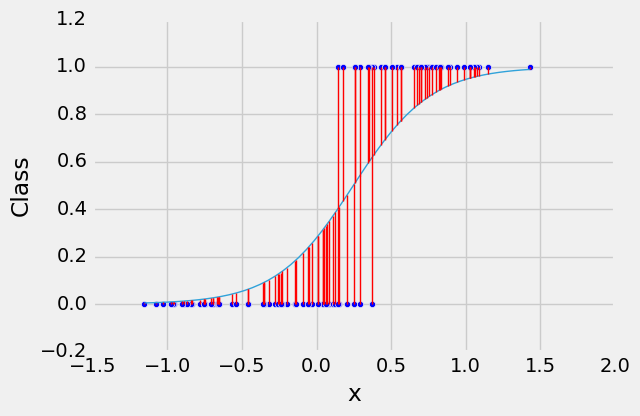

In [70]:
test1.plot_fit_1d('Class', 'x', logit1d.likelihood)

In [71]:
logit1d.params

(-0.9462124581477489, array([ 3.84156702]))

In [72]:
# Compute the cutting "plane", i.e., point for the claissifier
# p(x) = 0.5 where x = -b0/b1
p50 = -logit1d.params[0]/logit1d.params[1][0]
p50

0.24630898125576017

In [73]:
logit1d.likelihood(-1), logit1d.likelihood(p50), logit1d.likelihood(1)

(0.0082621048504563765, 0.5, 0.94761631780288358)

## 2D Logistic Regression of simulated data

In 2D, logistic regression finds a line that splits the plane.

In [12]:
n = 200
eps = 0.1
test2 = ML_Table.runiform('ix', n)
test2['iy'] = np.random.rand(n)
test2['Cat'] = test2.apply(lambda x, y: 'A' if x+y <0 else 'B', ['ix', 'iy'])
test2['Class A'] = test2.apply(lambda x: 1 if x=='A' else 0, 'Cat')
test2['x'] = test2['ix'] + eps*np.random.normal(size=n)
test2['y'] = test2['iy'] + eps*np.random.normal(size=n)

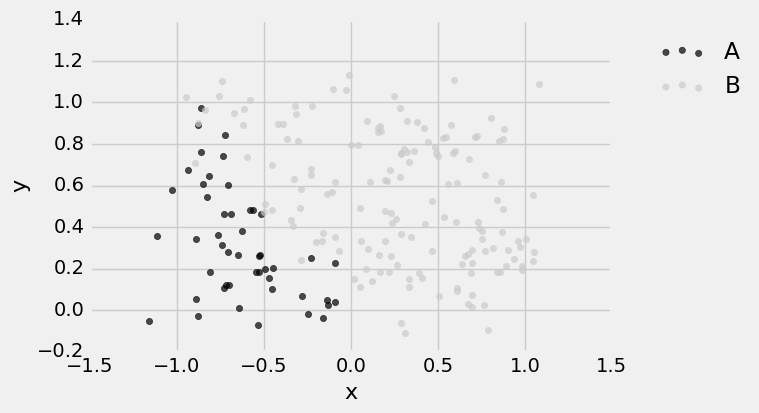

In [13]:
test2.pivot_scatter('Cat', 'x', 'y')

In [14]:
logit2d = test2.logit_regression('Class A', ['x', 'y'])
model_2d = logit2d.model

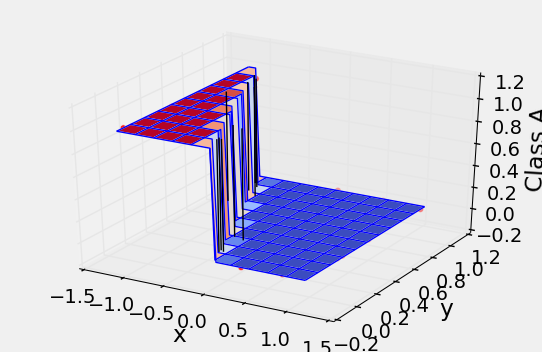

In [15]:
test2.plot_fit_2d('Class A', 'x', 'y', model_2d)

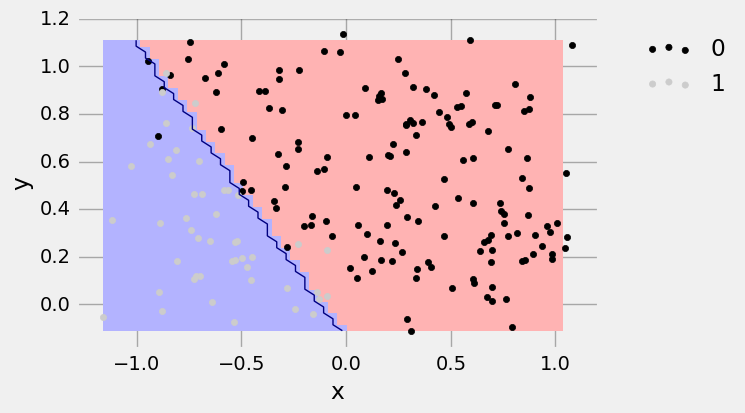

In [74]:
test2.plot_cut_2d('Class A', 'x', 'y', model_2d, n_grid=50)

In [17]:
# error rate
test2.classification_error_model('Class A', model_2d, ['x', 'y'])

0.05

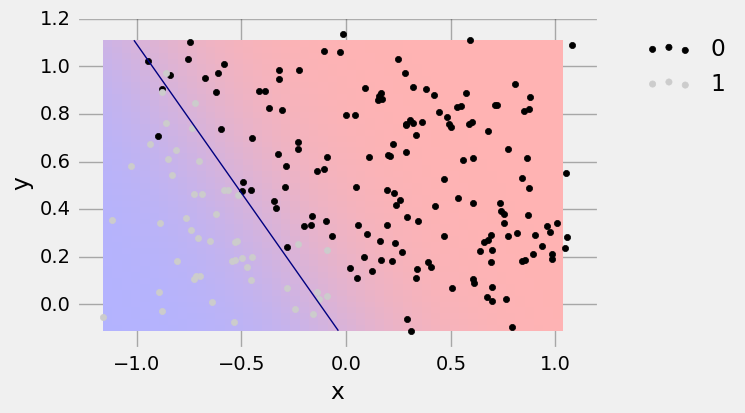

In [18]:
test2.plot_cut_2d('Class A', 'x', 'y', logit2d.likelihood, n_grid=50)

0.085

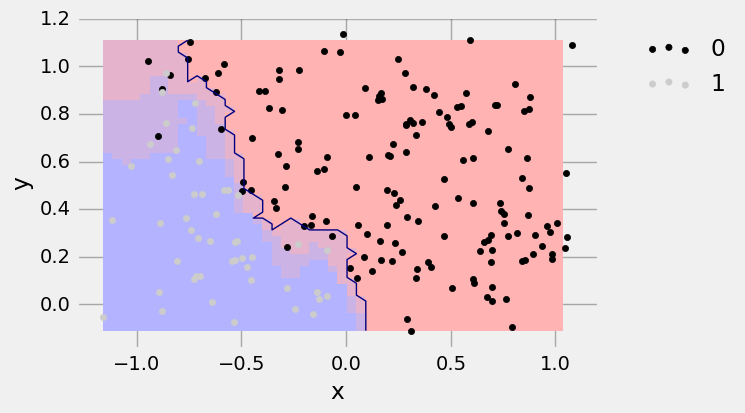

In [19]:
knn_reg = test2.knn_regression('Class A', ['x', 'y'], n_neighbors=3)
test2.plot_cut_2d('Class A', 'x', 'y', knn_reg.model, n_grid=50, levels=[0,1])
test2.classification_error_model('Class A', knn_reg.model, ['x', 'y'])

## Classification with logistic regression

In [20]:
raw_default = ML_Table.read_table("data/Default.csv")
raw_default

Unnamed: 0,default,student,balance,income
1,No,No,729.526,44361.6
2,No,Yes,817.18,12106.1
3,No,No,1073.55,31767.1
4,No,No,529.251,35704.5
5,No,No,785.656,38463.5
6,No,Yes,919.589,7491.56
7,No,No,825.513,24905.2
8,No,Yes,808.668,17600.5
9,No,No,1161.06,37468.5
10,No,No,0,29275.3


In [21]:
default = raw_default.drop('Unnamed: 0')
default['Default'] = np.where(default['default']=='Yes', 1, 0)
default['Student'] = np.where(default['student']=='Yes', 1, 0)
default

default,student,balance,income,Default,Student
No,No,729.526,44361.6,0,0
No,Yes,817.18,12106.1,0,1
No,No,1073.55,31767.1,0,0
No,No,529.251,35704.5,0,0
No,No,785.656,38463.5,0,0
No,Yes,919.589,7491.56,0,1
No,No,825.513,24905.2,0,0
No,Yes,808.668,17600.5,0,1
No,No,1161.06,37468.5,0,0
No,No,0,29275.3,0,0


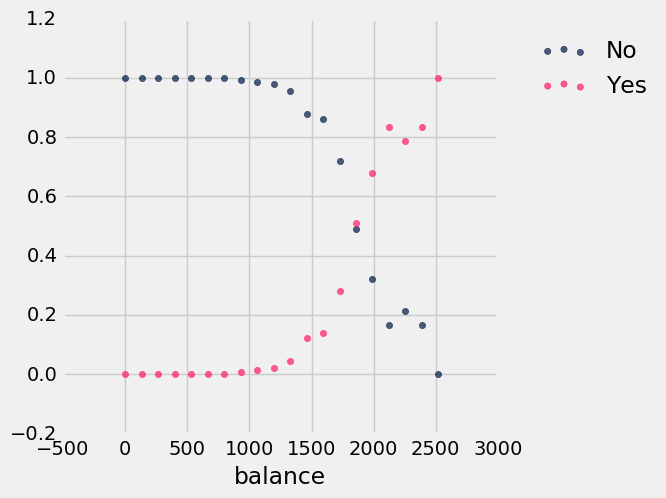

In [22]:
# Look at the trend in the data
default.density('default', 'balance').scatter('balance')

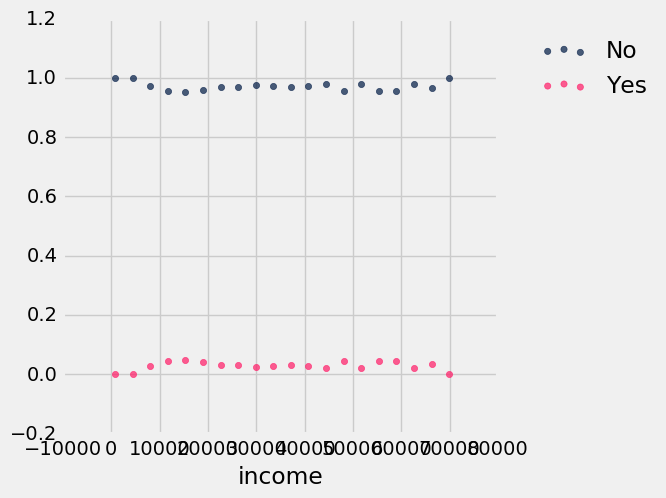

In [23]:
# Look at the trend in the data
default.density('default', 'income').scatter('income')

In [24]:
# Predict default based on balance
default_balance = default.logit_regression('Default', 'balance')

In [25]:
default_balance.summary()

Param,Coeffient
Intercept,-9.46507
balance,0.00478248


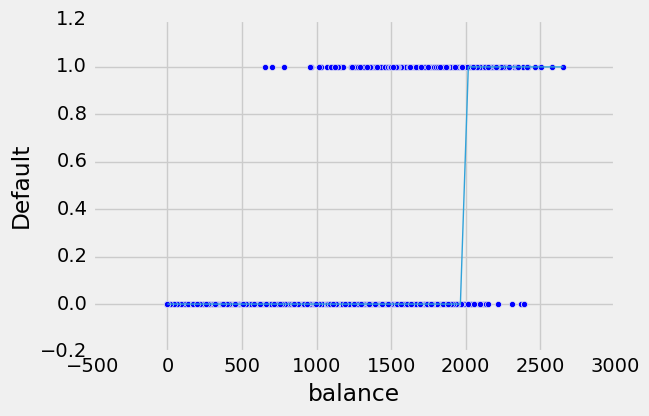

In [26]:
# Default when balance gets too high
default.plot_fit_1d('Default', 'balance', default_balance.model, connect=False)

In [27]:
default.classification_error_model('Default', default_balance.model, 'balance')

0.0274

In [28]:
# How impressive is this error rate?
default.where('Default').num_rows/default.num_rows

0.0333

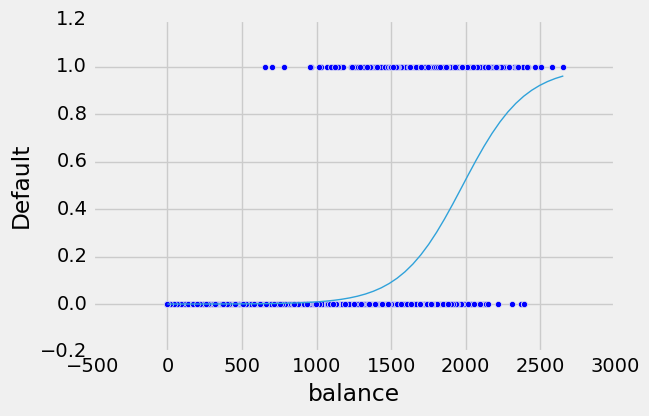

In [29]:
default.plot_fit_1d('Default', 'balance', default_balance.likelihood, connect=False)

In [30]:
default_balance.likelihood(1000), default_balance.likelihood(2000)

(0.0091701599811269373, 0.52495160381519868)

In [31]:
default_balance.obj.decision_function([[1000], [2000]])

array([-4.68258808,  0.09988939])

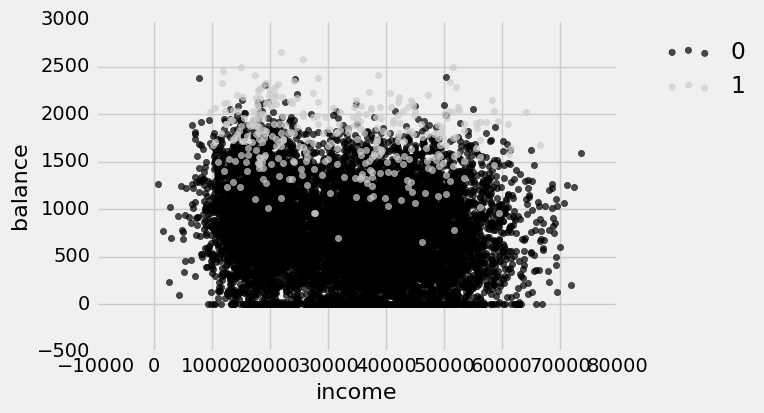

In [32]:
default.pivot_scatter('Default', 'income', 'balance')

In [33]:
# Predict default based on balance
default_BI = default.logit_regression('Default', ['balance', 'income'])

In [34]:
default_BI.summary()

Param,Coeffient
Intercept,-1.94164e-06
balance,0.000407565
income,-0.000125881


In [35]:
default_BI.obj.decision_function([[10000, 1000]])

array([ 3.94976362])

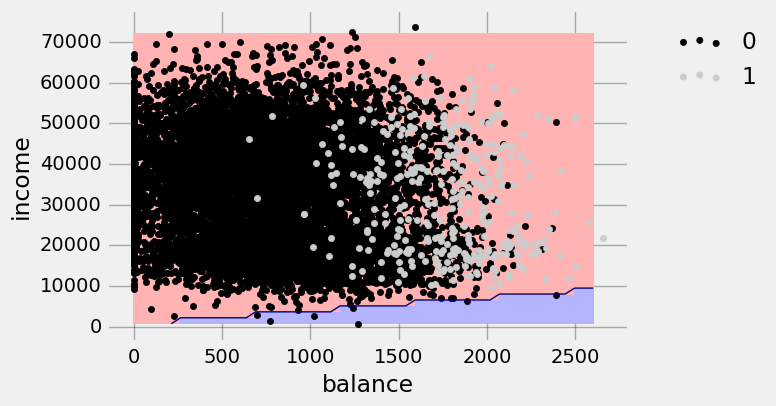

In [36]:
# This classifier does not seem to work at all on this data
default.plot_cut_2d('Default', 'balance','income', default_BI.model, levels=[0,1])

In [37]:
# basically discarded all the defaults
default.classification_error_model('Default', default_BI.model, ['balance', 'income'])

0.0336

In [38]:
default.logit_regression('Default', ['balance', 'income', 'Student']).summary()

Param,Coeffient
Intercept,-1.9418e-06
balance,0.000407584
income,-0.000125882
Student,-2.51031e-06


### Using knn regression for the classifier

0.0963

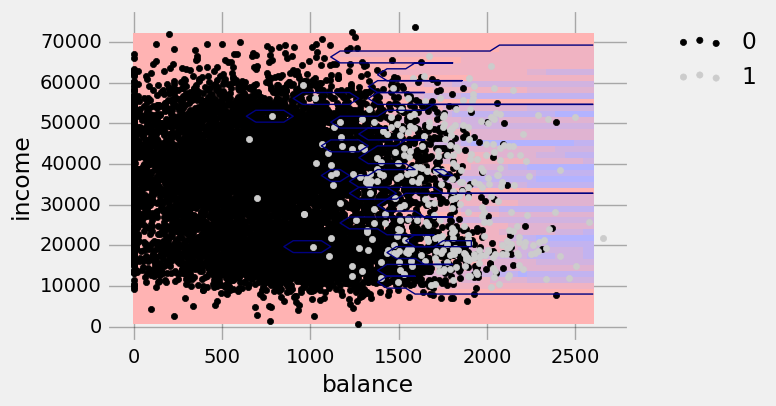

In [39]:
default_knn_BI = default.knn_regression('Default', ['balance', 'income'], n_neighbors=5)

default.plot_cut_2d('Default', 'balance', 'income', default_knn_BI.model, levels=[0,1])
default.classification_error_model('Default', default_knn_BI.model, ['balance', 'income'])

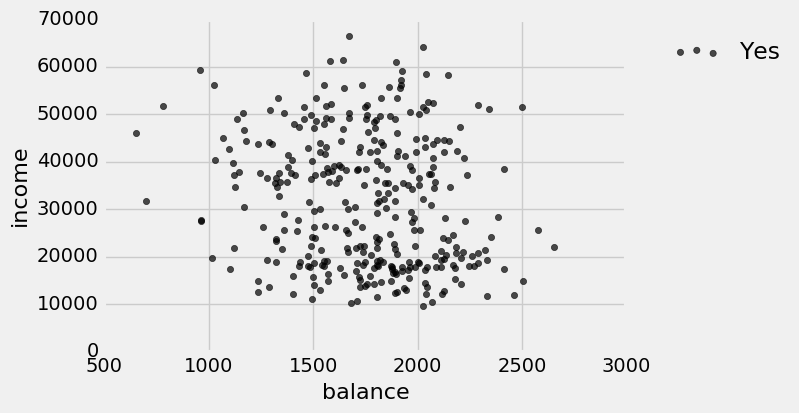

In [40]:
default.where('default', 'Yes').pivot_scatter('default',  'balance', 'income')

The book claims to have been able to do some clasification with balance and income, but it is very hard to find a cut that pulls out the defaults without as many false positives.

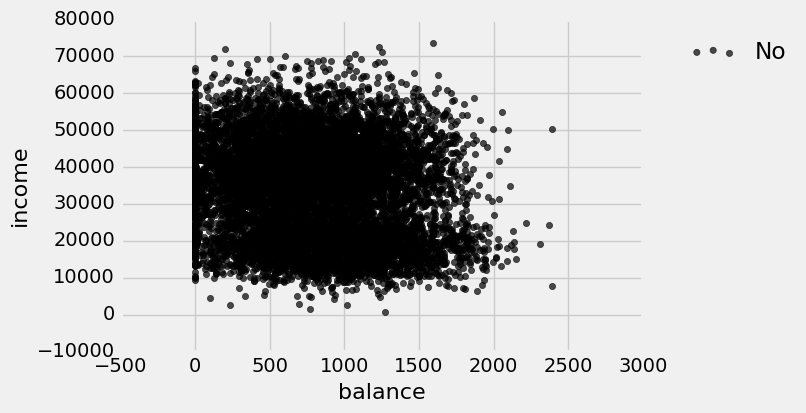

In [41]:
default.where('default', 'No').pivot_scatter('default',  'balance', 'income')

In [42]:
default_sample = default.sample(1000)

In [43]:
default_sample.where('default', 'Yes').num_rows, default_sample.num_rows

(41, 1000)

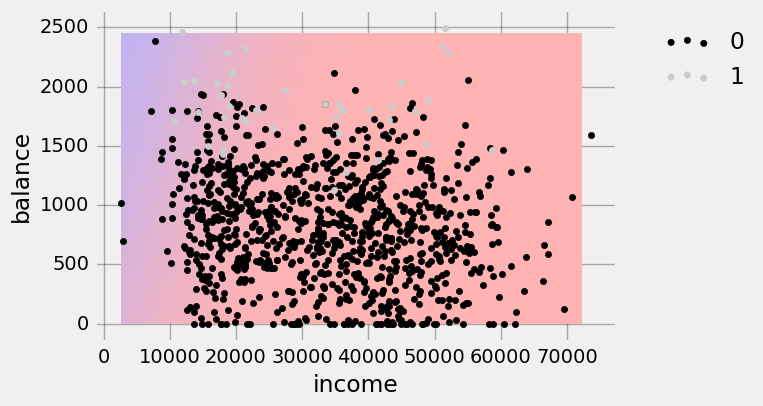

In [44]:
ds_lr = default_sample.logit_regression('Default', ['income', 'balance'])
default_sample.plot_cut_2d('Default', 'income', 'balance', ds_lr.likelihood, levels=[0,1])

In [45]:
ds_lr.summary()

Param,Coeffient
Intercept,-2.29916e-06
income,-0.000136097
balance,0.00075572


In [46]:
default_student = default.logit_regression('Default', 'Student')

In [47]:
default_student.summary()

Param,Coeffient
Intercept,-3.48496
Student,0.382569


In [48]:
default_student.likelihood(0), default_student.likelihood(1)

(0.029743137630008021, 0.043008638239327428)

In [49]:
default_BIS = default.logit_regression('Default', ['balance', 'income', 'Student'])
default_BIS.summary()

Param,Coeffient
Intercept,-1.9418e-06
balance,0.000407584
income,-0.000125882
Student,-2.51031e-06


In [50]:
default.summary()

statistic,default,student,balance,income,Default,Student
min,No,No,0,771.968,0,0
FirstQu,,,481.731,21340.5,0,0
median,,,823.637,34552.6,0,0
mean,,,835.375,33517,0.0333,0.2944
ThirdQu,,,0.42466,13431.8,0,0
max,Yes,Yes,2654.32,73554.2,1,1


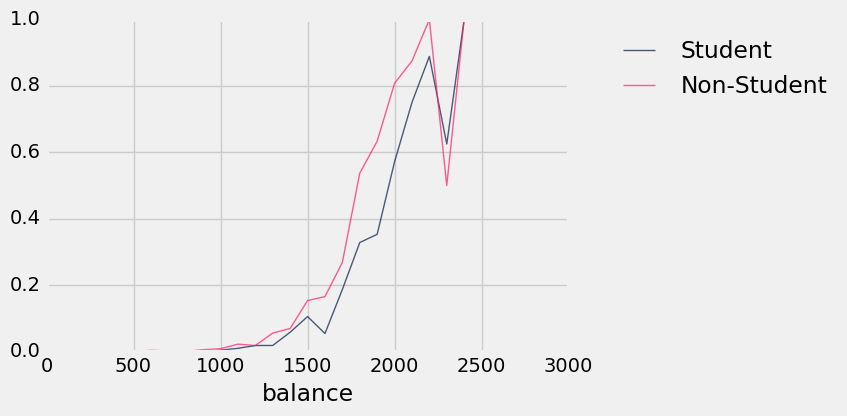

In [51]:
default_rates_stu = default.where('student', 'Yes').density('default', 'balance', bins=np.arange(0, 3000, 100)).drop('No')
default_rates_stu.relabel('Yes', 'Student')
default_rates_no = default.where('student', 'No').density('default', 'balance', bins=np.arange(0, 3000, 100)).drop('No')
default_rates_no.relabel('Yes', 'Non-Student')
default_rates = default_rates_stu.join('balance', default_rates_no)
default_rates.plot('balance')

In [52]:
raw_credit = ML_Table.read_table("data/Credit.csv")
credit = raw_credit.drop('Unnamed: 0')
credit['Gender'] = credit.apply(lambda x:x.strip(), 'Gender')
credit

Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
14.891,"3,606",283,2,34,11,Male,No,Yes,Caucasian,333
106.025,"6,645",483,3,82,15,Female,Yes,Yes,Asian,903
104.593,"7,075",514,4,71,11,Male,No,No,Asian,580
148.924,"9,504",681,3,36,11,Female,No,No,Asian,964
55.882,"4,897",357,2,68,16,Male,No,Yes,Caucasian,331
80.18,"8,047",569,4,77,10,Male,No,No,Caucasian,"1,151"
20.996,"3,388",259,2,37,12,Female,No,No,African American,203
71.408,"7,114",512,2,87,9,Male,No,No,Asian,872
15.125,"3,300",266,5,66,13,Female,No,No,Caucasian,279
71.061,"6,819",491,3,41,19,Female,Yes,Yes,African American,"1,350"


In [53]:
credit.where('Gender', 'Female').num_rows

207

In [54]:
credit.where('Gender', 'Male').num_rows

193

In [55]:
credit['Female'] = credit.apply(lambda x: 1 if x=='Female' else 0, 'Gender')

In [56]:
credit.Cor()

Param,Income,Limit,Rating,Cards,Age,Education,Balance,Female
Income,1,0.792088,0.791378,-0.0182726,0.175338,-0.027692,0.463656,-0.0107375
Limit,0.792088,1,0.99688,0.0102313,0.100888,-0.0235485,0.861697,0.00939668
Rating,0.791378,0.99688,1,0.053239,0.103165,-0.0301356,0.863625,0.00888459
Cards,-0.0182726,0.0102313,0.053239,1,0.0429483,-0.0510842,0.0864563,-0.022658
Age,0.175338,0.100888,0.103165,0.0429483,1,0.00361928,0.00183512,0.0040155
Education,-0.027692,-0.0235485,-0.0301356,-0.0510842,0.00361928,1,-0.00806158,-0.00504907
Balance,0.463656,0.861697,0.863625,0.0864563,0.00183512,-0.00806158,1,0.021474
Female,-0.0107375,0.00939668,0.00888459,-0.022658,0.0040155,-0.00504907,0.021474,1


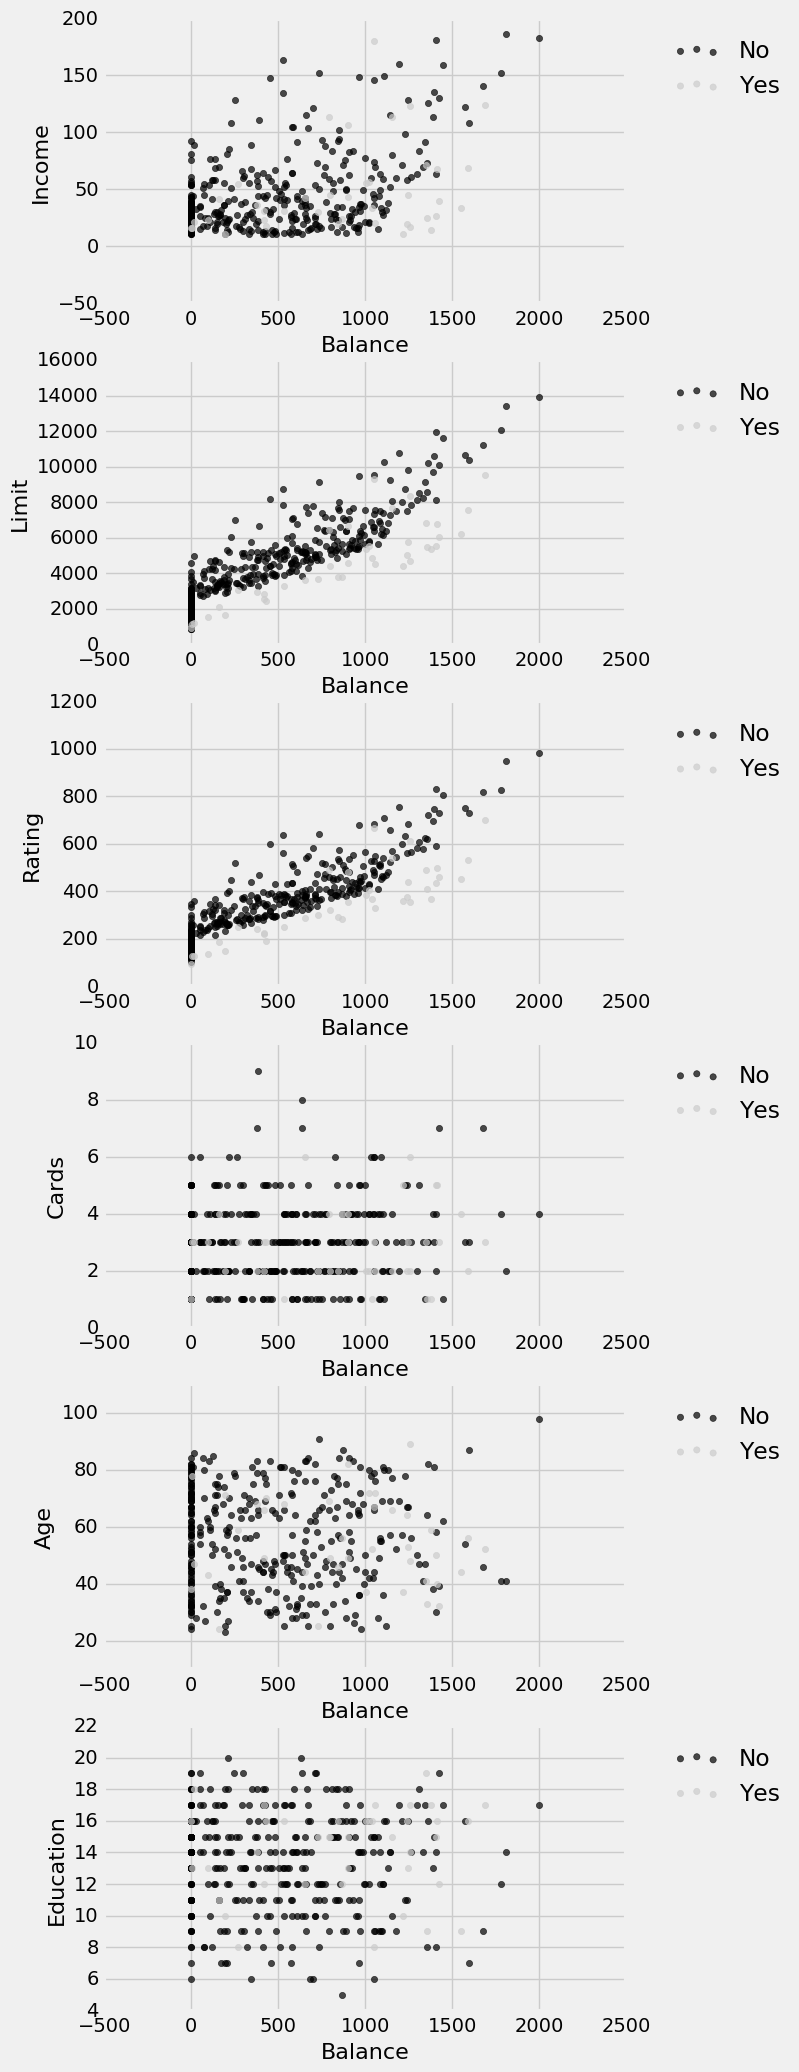

In [57]:
credit.pivot_scatter('Student', 'Balance', select=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education'])

In [58]:
credit['Student Class'] = credit.apply(lambda x: 1 if x=='Yes' else 0, 'Student')
credit

Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Female,Student Class
14.891,"3,606",283,2,34,11,Male,No,Yes,Caucasian,333,0,0
106.025,"6,645",483,3,82,15,Female,Yes,Yes,Asian,903,1,1
104.593,"7,075",514,4,71,11,Male,No,No,Asian,580,0,0
148.924,"9,504",681,3,36,11,Female,No,No,Asian,964,1,0
55.882,"4,897",357,2,68,16,Male,No,Yes,Caucasian,331,0,0
80.18,"8,047",569,4,77,10,Male,No,No,Caucasian,"1,151",0,0
20.996,"3,388",259,2,37,12,Female,No,No,African American,203,1,0
71.408,"7,114",512,2,87,9,Male,No,No,Asian,872,0,0
15.125,"3,300",266,5,66,13,Female,No,No,Caucasian,279,1,0
71.061,"6,819",491,3,41,19,Female,Yes,Yes,African American,"1,350",1,1


error 0.0575
density 0.1


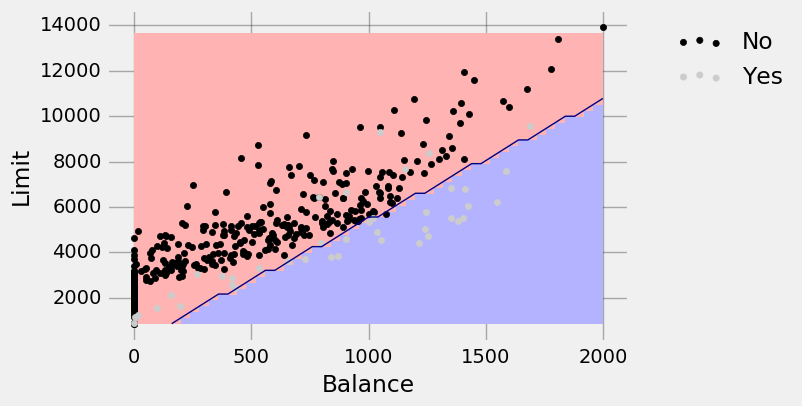

In [59]:
cr = credit.logit_regression('Student Class', ['Balance', 'Limit'])

credit.plot_cut_2d('Student', 'Balance', 'Limit', cr.model, levels=[0,1])
print('error', credit.classification_error_model('Student Class', cr.model, ['Balance', 'Limit']))
print('density', credit.where('Student Class').num_rows/credit.num_rows)

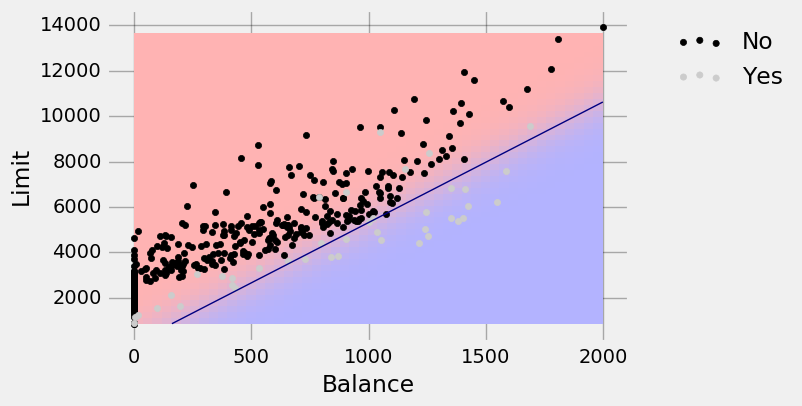

In [60]:
credit.plot_cut_2d('Student', 'Balance', 'Limit', cr.likelihood)

## Linear discriminant analysis

error 0.0575


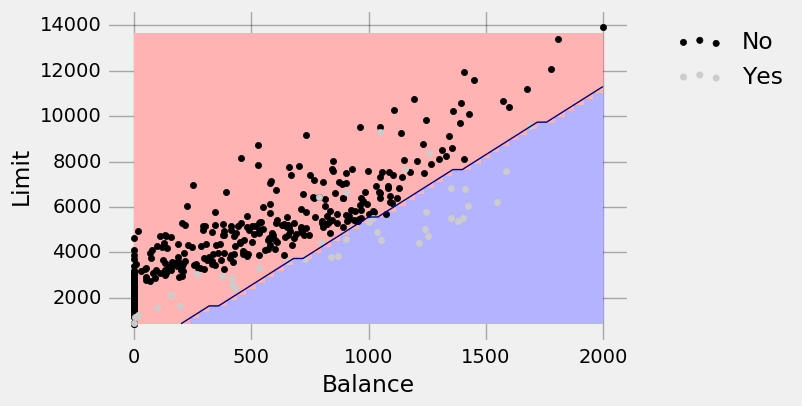

In [61]:
lda = credit.LDA('Student Class', ['Balance', 'Limit'])

credit.plot_cut_2d('Student', 'Balance', 'Limit', lda.model, levels=[0,1])
print('error', credit.classification_error_model('Student Class', lda.model, ['Balance', 'Limit']))

0.0276

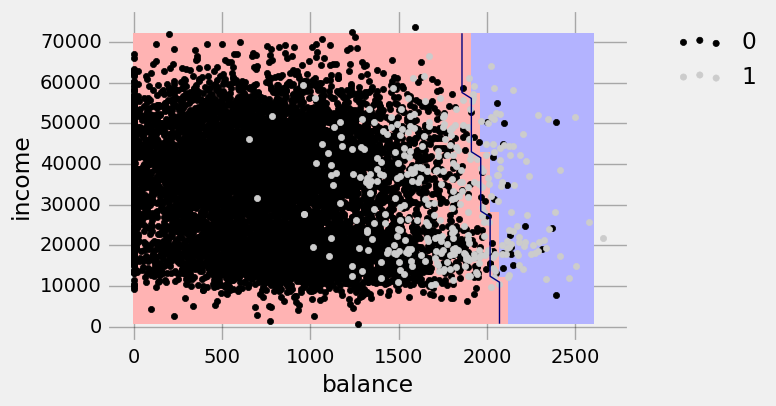

In [62]:
default_lda_BI = default.LDA('Default', ['balance', 'income'])

default.plot_cut_2d('Default', 'balance', 'income', default_lda_BI.model, levels=[0,1])
default.classification_error_model('Default', default_lda_BI.model, ['balance', 'income'])